# Simple Regression Model

## Step 1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Step 2: Load Dataset

In [4]:
df = pd.read_csv("/Users/mac/Downloads/housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Step 3: Select Features and Target
NB: For this model, we will be using the median_income as the feature (X) and median_house_valueas the target (Y)

In [7]:
df[["median_income", "median_house_value"]].head(10)

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0
9,3.6912,261100.0


In [8]:
df[["median_income", "median_house_value"]].describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


## Step 4: Visualize Data

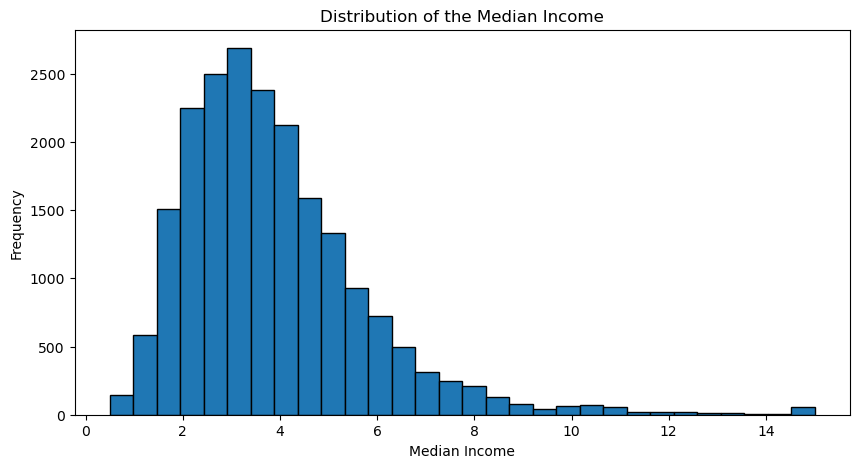

In [9]:
# Histogram for median_income
plt.figure(figsize = (10, 5))
plt.hist(df["median_income"], bins = 30, edgecolor = "black")
plt.title("Distribution of the Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

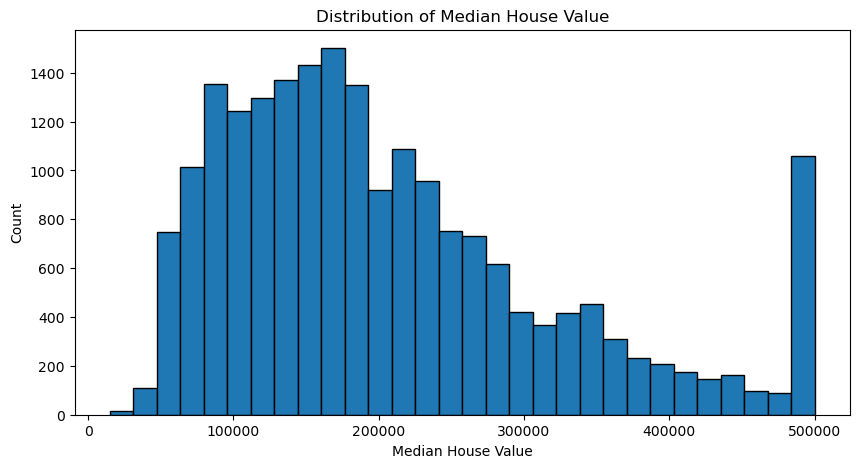

In [10]:
# Histogram for Median House Value
plt.figure(figsize = (10, 5))
plt.hist(df["median_house_value"], bins = 30, edgecolor = "black")
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.show()

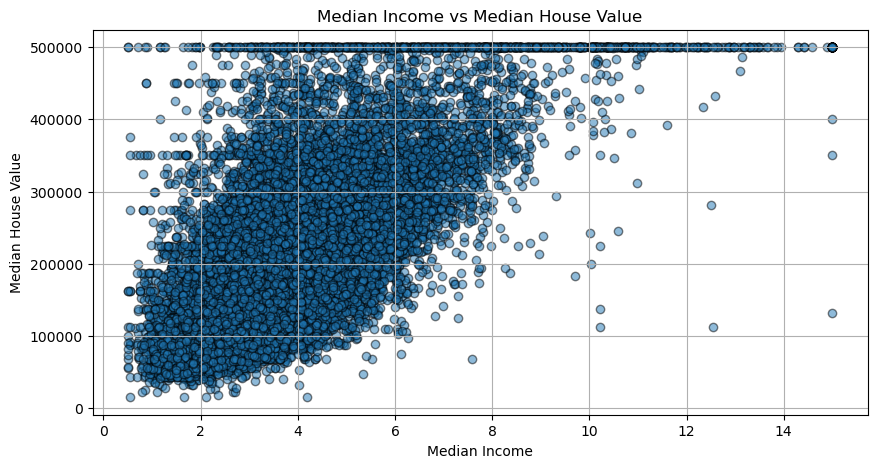

In [11]:
# Create the Scatter plot of Midean_income against median_house_value
plt.figure(figsize = (10, 5))
plt.scatter(df["median_income"], df["median_house_value"], alpha = 0.5, edgecolor = "k")
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()

Positive Trend

- There's a clear upward pattern: as median income increases, median house value also increases.

- This confirms a positive correlation, making it suitable for simple linear regression.

## Step 5: Train Linear Regression Model

In [14]:
# Define features (X) and target (y)
X = df[["median_income"]] # The double quote is to keep it as a dataframe
y = df["median_house_value"]

print(X.shape)
print(y.shape)

(20640, 1)
(20640,)


In [15]:
model = LinearRegression() # Create the Linear Regression model
model.fit(X, y) # Train the model on all data

LinearRegression()

In [16]:
# Get model parameters
slope = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)

In [17]:
print(slope)
print(intercept)

41793.85
45085.58


**Understanding Model Parameters in Simple Linear Regression**

In simple linear regression, the model tries to find the best-fitting straight line between a feature (input) and a target (output). That line is defined by two key parameters:

$$
Prediction = slope × feature + intercept
$$


* Slope (Coefficient) = 41793.85

* Intercept = 45085.58

* Feature = median_income

So, the regression equation becomes:

$$
Predicted Median House Value = 41793.85 × Median Income + 45085.58
$$

## Step 6: Evaluate Model

In [18]:
y_pred = model.predict(X)
print(y_pred)

[393027.73007889 392033.03646789 348400.25790111 ... 116135.12034649
 123123.05193305 144914.36490692]


In [20]:
results_df = pd.DataFrame({"Actual": y, "Predicted": y_pred})
display(results_df.head(10)) # display makes output prettier than print()

,Actual,Predicted
0,452600.0,393027.730079
1,358500.0,392033.036468
2,352100.0,348400.257901
3,341300.0,280932.447134
4,342200.0,205833.079504
5,269700.0,213798.987161
6,299200.0,198013.450318
7,241400.0,175482.386213
8,226700.0,132033.500583
9,261100.0,199355.032877


In [3]:
plt.figure(figsize = (10, 5))
plt.scatter(X, y, alpha = 0.5, edgecolor = "k", label = "Actual Data")

plt.plot(X, y_pred, color = "red", linewidth = 2, label = "Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression (All Data used)")
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'X' is not defined

<Figure size 1000x500 with 0 Axes>

## **Data Dictionary**

|Feature | Description|
|--------|------------|
|longitude	|The geographic longitude (east-west location) of the housing block.
latitude	|The geographic latitude (north-south location) of the housing block.
housing_median_age	|The median age of the houses in the block (in years).
total_rooms	|The total number of rooms in all houses in the block.
total_bedrooms	|The total number of bedrooms in all houses in the block.
population	|The total number of people living in the block.
households	|The total number of households (e.g., families or individuals living together).
median_income	|The median income of the residents in the block (in tens of thousands). For example, a value of 3.5 means $35,000.
median_house_value	|The median house price in that block (in dollars).
ocean_proximity	|Describes how close the block is to the ocean.